# Метод k ближайших соседей
(из спец курса "Введение в компьютерный интеллект. Машинное обучение" механико-математического факультета МГУ)

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print((train_x.shape, train_y.shape, test_x.shape, test_y.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


label is 4


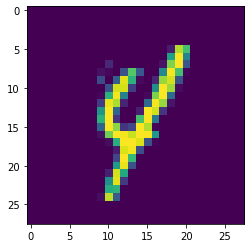

In [3]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [4]:
train_x_1 = train_x.reshape(len(train_x),-1)
test_x_1 = test_x.reshape(len(test_x),-1)
print(train_x_1.shape, test_x_1.shape)

(60000, 784) (10000, 784)


# Фиктивный классификатор

In [5]:
class DummyClassifier(object):
  def _init_(self):
    self.name='Dummy'
  def fit(self, train_x, train_y):
    pass
  def predict(self, test_x):
    return np.random.randint(low=0, high=10, size=len(test_x))

In [6]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1) 

In [14]:
def accuracy(pred, gt):
  return np.sum(pred == gt)/len(gt)

In [7]:
acc = accuracy(pred, test_y)
print(acc)

NameError: ignored

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(pred, test_y)

0.1032

# k-ближайших соседей

In [10]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [11]:
result=[]
for k in range(1,10, 2):
  classifier = knn(n_neighbors=k)
  classifier.fit(train_x_1[:1000], train_y[:1000])
  pred = classifier.predict(test_x_1[:100])
  acc = accuracy_score(pred, test_y[:100])
  result.append(acc)
  print(k, acc)

1 0.83
3 0.83
5 0.84
7 0.81
9 0.82


In [12]:
result=[]
for k in range(1,10, 2):
  classifier = knn(n_neighbors=k)
  classifier.fit(train_x_1[:2000], train_y[:2000])
  pred = classifier.predict(test_x_1[:100])
  acc = accuracy_score(pred, test_y[:100])
  result.append(acc)
  print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [13]:
result=[]
for k in range(1,10, 2):
  classifier = knn(n_neighbors=k)
  classifier.fit(train_x_1[:5000], train_y[:5000])
  pred = classifier.predict(test_x_1[:100])
  acc = accuracy_score(pred, test_y[:100])
  result.append(acc)
  print(k, acc)

1 0.9
3 0.94
5 0.95
7 0.95
9 0.95


In [29]:
k=5
classifier = knn(n_neighbors=k)
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1[:100])
acc = accuracy_score(pred, test_y[:100])
print(k, acc)

5 0.99


In [ ]:
k=5
classifier = knn(n_neighbors=k)
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(k, acc)

In [14]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

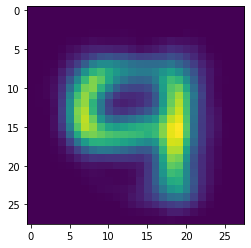

In [17]:
for cluster in km.cluster_centers_:
  plt.imshow(cluster.reshape(28,28))
  plt.show